an AI solution for Quality Control in a standard production unit, in the form of a classification problem. Following a very interesting approach, I try to achieve the best possible performance, giving a visual explanation of the results and taking into account the useful human insights.

Our aim is to maximize the efficiency of the production system, trying to identify the possible types of steel plate faults (7 in total) only considering the metadata of the products. In this way, we will be able to identify the fallacies of the production system and accordingly react.

# Library 

In [5]:
import pandas as pd
import numpy as np
import tqdm
import itertools

import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import scoring

# load data

In [8]:
### LOAD DATA ###
df = pd.read_csv(r'E:\gitlab\machine-learning\dataset\Steel_Plates_Faults.csv')
label = df.Fault
df = df.drop('Fault',axis=1)

print(df.shape)
df.head()

(1941, 27)


X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0                    108  ...           0.0047         0.4706         1.0000   
1                    123  ...           0.0036         0.6000         0.9667   
2                    125  ...           0.0037         0.7500         0.9474   
3                    126  ...           0.0052         0.5385         1.0000   
4                    126  ...           0.0126         0.2833         0.9885   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.4265       0.9031       1.6435   
1                   1.0      2.0334       0.7782       1.4624   
2                   1.0      1.8513       0.7782       1.2553   
3                   1.0      2.2455       0.8451       1.6532   
4                   1.0      3.3818       1.2305       2.4099   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0             0.8182           -0.2913          0.5822  
1             0.7931           -0.1756          0.2984  
2             0.6667           -0.1228          0.2150  
3             0.8444           -0.1568          0.5212  
4             0.9338           -0.1992          1.0000  

[5 rows x 27 columns]

<AxesSubplot:ylabel='Fault'>

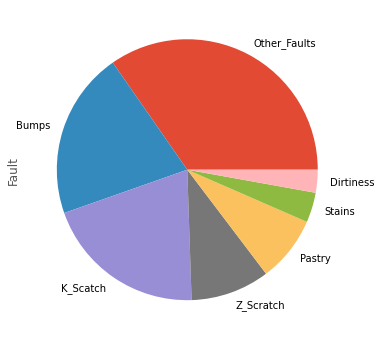

In [9]:
### TARGET DISTRIBUTION ###
label.value_counts().plot.pie(figsize=(6,6))

# GENERATE TRAIN TEST

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, label, random_state = 42,test_size=0.2)
print("train:", X_train.shape, "test:", X_test.shape)

train: (1552, 27) test: (389, 27)


# FIRST MODEL

In [11]:
rfc = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=500, random_state=42))
rfc.fit(X_train, y_train)

OneVsRestClassifier(estimator=GradientBoostingClassifier(n_estimators=500,
                                                         random_state=42))

In [13]:
print(accuracy_score(y_test, rfc.predict(X_test)))
print(classification_report(y_test, rfc.predict(X_test)))

0.7917737789203085
              precision    recall  f1-score   support

       Bumps       0.63      0.69      0.66        72
   Dirtiness       0.60      0.75      0.67         8
    K_Scatch       0.95      0.95      0.95        83
Other_Faults       0.75      0.76      0.76       143
      Pastry       0.64      0.48      0.55        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       1.00      0.93      0.96        41

    accuracy                           0.79       389
   macro avg       0.80      0.78      0.79       389
weighted avg       0.80      0.79      0.79       389



In [14]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

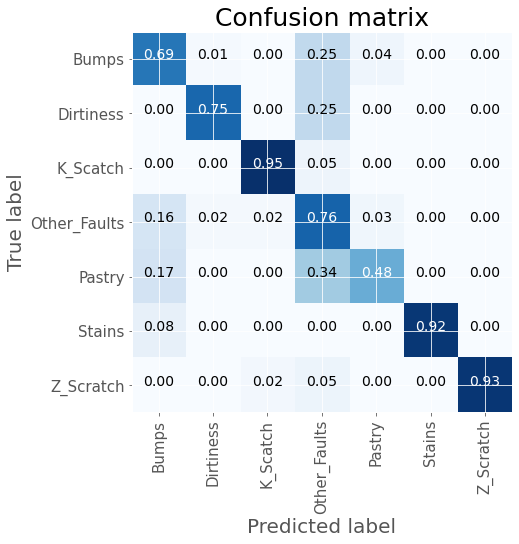

In [15]:
plt.figure(figsize=(7,7))

cnf_matrix = confusion_matrix(y_test, rfc.predict(X_test))
plot_confusion_matrix(cnf_matrix, classes=np.unique(label), title="Confusion matrix")

comfusion matrix = 
[[ 50   1   0  18   3   0   0]
 [  0   6   0   2   0   0   0]
 [  0   0  79   4   0   0   0]
 [ 23   3   3 109   5   0   0]
 [  5   0   0  10  14   0   0]
 [  1   0   0   0   0  12   0]
 [  0   0   1   2   0   0  38]]

accuracy_score =  0.7918
balanced_accuracy_score =  0.7845

precision score =  0.7952
recall score =  0.7918

F1 score =  0.792
AUC of ROC =  0.9427

classification_report
              precision    recall  f1-score   support

       Bumps       0.63      0.69      0.66        72
   Dirtiness       0.60      0.75      0.67         8
    K_Scatch       0.95      0.95      0.95        83
Other_Faults       0.75      0.76      0.76       143
      Pastry       0.64      0.48      0.55        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       1.00      0.93      0.96        41

    accuracy                           0.79       389
   macro avg       0.80      0.78      0.79       389
weighted avg       0.80      0.79      0.79    

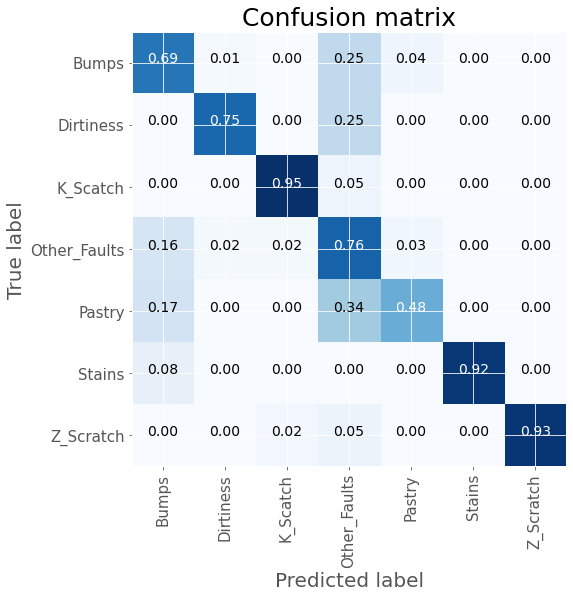


time span=  9


In [17]:
scoring.print_score_multiclass(y_test, rfc.predict(X_test),rfc.predict_proba(X_test),1,10,label,classes=[0,1,2,3,4,5,6])

# reduce dimensions

reduce the starting dimensions (27 variables) to only 2 dimensions fitting a TSNE.

# VISUALIZATION

In [18]:
scaler = StandardScaler()
scaler.fit(X_train.astype('float64'))

tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=5)
T = tsne.fit_transform(scaler.transform(df.astype('float64')))

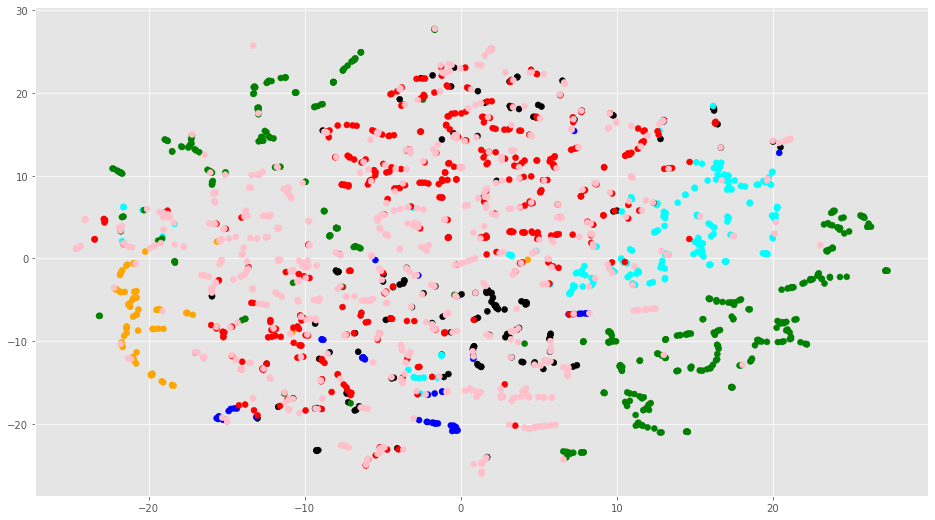

In [19]:
plt.figure(figsize=(16,9))

colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan'}
plt.scatter(T.T[0], T.T[1], c=[colors[i] for i in LabelEncoder().fit_transform(label)])

the algorithm aren’t able to identify a clear separation from the Other_Faults (pink dots) to the remaining classes. In this way the recall values from the confusion matrix for the Other_Faults make sense. Other_Faults is a noisy class and we have to take into account this aspect in our analysis.

take advantage of notorious and underestimated human insights.

# PLOT WITHOUT OTHER_FAULTS ###

In [20]:
tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=5)
T = tsne.fit_transform(scaler.transform(df[label != 'Other_Faults'].astype('float64')))

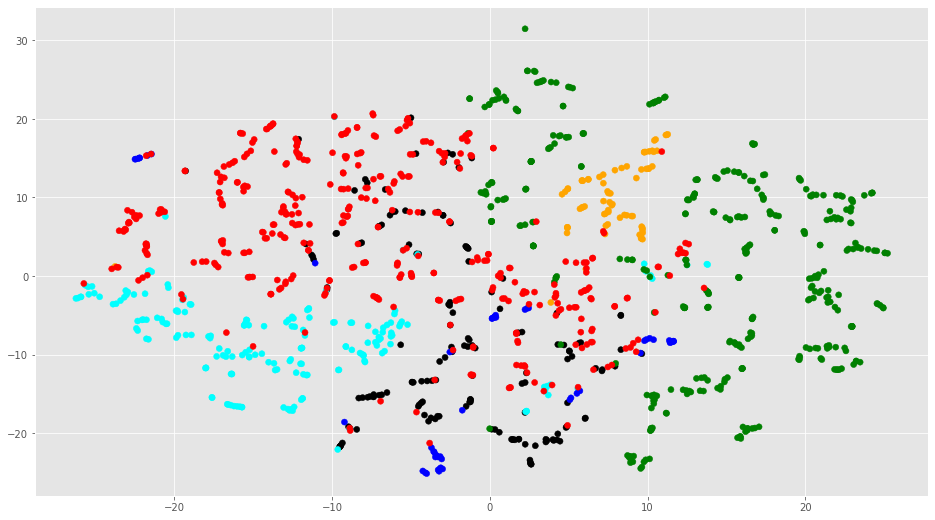

In [21]:
plt.figure(figsize=(16,9))

colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'orange', 5:'cyan'}
plt.scatter(T.T[0], T.T[1], c=[colors[i] for i in LabelEncoder().fit_transform(label[label != 'Other_Faults'])])

# EXCLUDE OTHER_FAULTS FROM TRAIN & TEST

In [22]:
X_train2, y_train2 = X_train[y_train != 'Other_Faults'].copy(), y_train[y_train != 'Other_Faults'].copy()
X_test2, y_test2 = X_test[y_test != 'Other_Faults'].copy(), y_test[y_test != 'Other_Faults'].copy()

print("train:", X_train2.shape, "test:", X_test2.shape)

train: (1022, 27) test: (246, 27)


# SECOND MODEL

In [23]:
rfc2 = GradientBoostingClassifier(n_estimators=500, random_state=42)
rfc2.fit(X_train2, y_train2)

GradientBoostingClassifier(n_estimators=500, random_state=42)

In [24]:
print(accuracy_score(y_test2, rfc2.predict(X_test2)))
print(classification_report(y_test2, rfc2.predict(X_test2)))

0.8983739837398373
              precision    recall  f1-score   support

       Bumps       0.82      0.88      0.85        72
   Dirtiness       0.75      0.75      0.75         8
    K_Scatch       1.00      0.98      0.99        83
      Pastry       0.68      0.66      0.67        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       1.00      0.98      0.99        41

    accuracy                           0.90       246
   macro avg       0.87      0.86      0.87       246
weighted avg       0.90      0.90      0.90       246



# CREATE THRESHOLD

So we need a way to translate the uncertainty, that appears when people try to classify an ambiguous steel plate, in machine learning language.

I have encoded this uncertainty imposing a threshold on each class on our final predictions. To build this threshold I have made the predictions with our second model on the Other_Faults samples and I’ve stored it, maintaining the separation for each predicted class

In [25]:
scoring.predict_threshold([df[label == 'Other_Faults'].values[4]], rfc2)

{'label': 'Z_Scratch', 'confidence': 0.9193040405363531}

# MAKE PRED ON OTHER_FAULTS

In [27]:
pred_lab = []
pred_conf = []
for row in tqdm.tqdm(X_train[y_train == 'Other_Faults'].values):
    pred = scoring.predict_threshold([row], rfc2)
    pred_lab.append(pred['label'])
    pred_conf.append(pred['confidence'])

100%|███████████████████████████████████████████████████████████████████████████████| 530/530 [00:01<00:00, 482.26it/s]


# PLOT SCORES

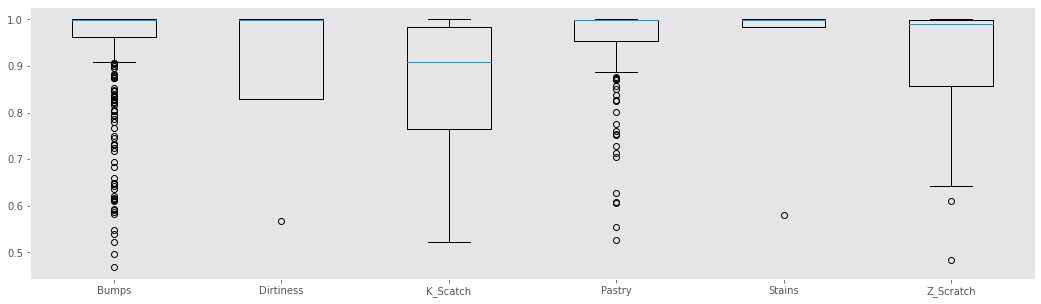

In [28]:
other_pred = pd.DataFrame({'label':pred_lab, 'pred':pred_conf})
diz_score = other_pred.groupby('label')['pred'].apply(list).to_dict()

plt.figure(figsize=(18,5))

plt.boxplot(diz_score.values(), labels=diz_score.keys())

plt.grid(False); plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 530/530 [00:01<00:00, 421.78it/s]


{'Bumps': 0.982301171001041, 'Dirtiness': 0.8631106294683912, 'K_Scatch': 0.8097222764306907, 'Pastry': 0.9682636292870939, 'Stains': 0.9861340528458336, 'Z_Scratch': 0.9244904011213837}


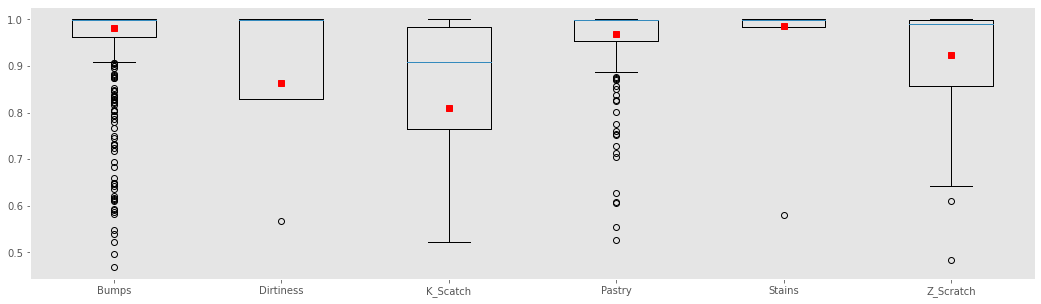

In [39]:
other_pred,diz_score,threshold_p = scoring.predict_threshold_bulk(X_train[y_train == 'Other_Faults'].values,rfc2,30)

# MAKE PREDICTION ON TEST WITHOT OTHER_FAULTS + THRESHOLD

In [40]:
final_pred = []
for row in tqdm.tqdm(X_test2.values):
    final_pred.append(scoring.predict_threshold([row], rfc2, threshold_map=threshold_p)["label"])

100%|███████████████████████████████████████████████████████████████████████████████| 246/246 [00:00<00:00, 388.01it/s]


In [43]:
print(accuracy_score(y_test2, final_pred))
print(classification_report(y_test2, final_pred))

0.8455284552845529
              precision    recall  f1-score   support

       Bumps       0.92      0.82      0.87        72
   Dirtiness       0.86      0.75      0.80         8
    K_Scatch       1.00      0.98      0.99        83
      OTHERS       0.00      0.00      0.00         0
      Pastry       0.68      0.45      0.54        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       1.00      0.90      0.95        41

    accuracy                           0.85       246
   macro avg       0.78      0.69      0.73       246
weighted avg       0.94      0.85      0.89       246



If we will increase the threshold, we will lose accuracy points, but we will get higher precision, and so on.

Regarding the Other_Faults class, we are assuming that it exists in the form of an ‘indecision class’, which contains all the samples classified by the model with low confidence. At the same time, we are assuming that all the samples of the original Other_Faults class belong to the class pointed by the model if the confidence is higher than the threshold (we trust this).

# TRY TO PREDICT INCLUDING OTHER_FAULTS

In [47]:
y_train = []
for row in tqdm.tqdm(X_train.values):
    y_train.append(scoring.predict_threshold([row], rfc2, threshold_map=threshold_p)["label"])
    
y_test = []
for row in tqdm.tqdm(X_test.values):
    y_test.append(scoring.predict_threshold([row], rfc2, threshold_map=threshold_p)["label"])

100%|███████████████████████████████████████████████████████████████████████████████| 389/389 [00:00<00:00, 541.03it/s]


In [48]:
other_final_pred = y_train + y_test
pd.value_counts(other_final_pred)

Bumps        688
K_Scatch     427
Pastry       250
OTHERS       228
Z_Scratch    213
Stains        75
Dirtiness     60
dtype: int64

In [54]:
y_train,y_test,other_final_pred = scoring.predict_with_threshold(X_train,X_test,rfc2,threshold_p)

100%|███████████████████████████████████████████████████████████████████████████████| 389/389 [00:00<00:00, 449.69it/s]

Bumps        688
K_Scatch     427
Pastry       250
OTHERS       228
Z_Scratch    213
Stains        75
Dirtiness     60
dtype: int64


# FINAL VISUALIZATION

# PLOT WITH THE 'NEW' OTHER_FAULTS CLASS

In [44]:
tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=5)
T = tsne.fit_transform(scaler.transform(pd.concat([X_train,X_test]).astype('float64')))

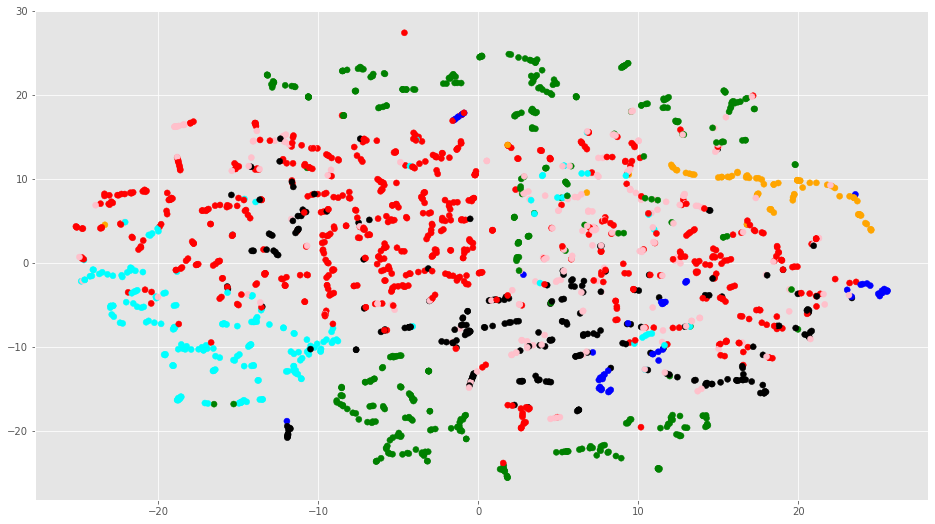

In [49]:
plt.figure(figsize=(16,9))

colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan'}
plt.scatter(T.T[0], T.T[1], c=[colors[i] for i in LabelEncoder().fit_transform(other_final_pred)])

# FINAL MODEL WITH RESET LABEL

In [55]:
rfc3 = GradientBoostingClassifier(n_estimators=500, random_state=42)
rfc3.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=42)

In [56]:
print(accuracy_score(y_test, rfc3.predict(X_test)))
print(classification_report(y_test, rfc3.predict(X_test)))

0.8586118251928021
              precision    recall  f1-score   support

       Bumps       0.86      0.98      0.91       128
   Dirtiness       0.91      1.00      0.95        10
    K_Scatch       0.97      0.94      0.95        89
      OTHERS       0.73      0.33      0.45        67
      Pastry       0.68      0.95      0.80        43
      Stains       1.00      1.00      1.00        13
   Z_Scratch       0.93      1.00      0.96        39

    accuracy                           0.86       389
   macro avg       0.87      0.89      0.86       389
weighted avg       0.85      0.86      0.84       389

